In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from scipy.stats import skew, kurtosis

In [47]:
data = pd.read_csv('archive/Alternate Wide Format Files/nmdb-new-mortgage-statistics-all-counts-alt-annual.csv')

In [48]:
data

,SOURCE,FREQUENCY,GEOLEVEL,GEOID,GEONAME,MARKET,PERIOD,YEAR,QUARTER,MONTH,...,PCT_AGE_LT25,PCT_AGE_2534,PCT_AGE_3544,PCT_AGE_4554,PCT_AGE_5564,PCT_AGE_GE65,PCT_MALEBOR,PCT_FEMALEBOR,PCT_TWOBOR,PCT_MULTIBOR
0,NMDB,Annual,National,USA,United States,All Mortgages,1998,1998,4,12,...,2.8,24.8,34.1,24.0,10.0,4.3,18.9,16.2,64.3,0.6
1,NMDB,Annual,National,USA,United States,All Mortgages,1999,1999,4,12,...,3.6,25.4,32.5,23.6,10.4,4.4,22.0,18.2,59.2,0.6
2,NMDB,Annual,National,USA,United States,All Mortgages,2000,2000,4,12,...,4.5,27.4,31.3,22.4,10.1,4.3,25.0,19.7,54.9,0.4
3,NMDB,Annual,National,USA,United States,All Mortgages,2001,2001,4,12,...,3.1,25.0,32.9,24.2,10.6,4.2,22.1,18.0,59.3,0.6
4,NMDB,Annual,National,USA,United States,All Mortgages,2002,2002,4,12,...,2.6,22.3,32.8,25.9,11.9,4.5,22.3,18.2,59.1,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37440,NMDB,Annual,State,WY,Wyoming,Jumbo Market (Refinance),2017,2017,4,12,...,0.0,0.0,60.0,20.0,0.0,20.0,60.0,0.0,40.0,0.0
37441,NMDB,Annual,State,WY,Wyoming,Jumbo Market (Refinance),2018,2018,4,12,...,0.0,20.0,20.0,40.0,20.0,0.0,20.0,20.0,60.0,0.0
37442,NMDB,Annual,State,WY,Wyoming,Jumbo Market (Refinance),2019,2019,4,12,...,0.0,0.0,40.0,20.0,40.0,0.0,20.0,0.0,80.0,0.0
37443,NMDB,Annual,State,WY,Wyoming,Jumbo Market (Refinance),2020,2020,4,12,...,0.0,0.0,60.0,0.0,20.0,20.0,60.0,0.0,40.0,0.0


In [49]:
#print number unique values in each column
for col in data.columns:
    print(col, len(data[col].unique()))

SOURCE 1
FREQUENCY 1
GEOLEVEL 4
GEOID 65
GEONAME 65
MARKET 24
PERIOD 25
YEAR 25
QUARTER 1
MONTH 1
SUPPRESSED 2
TOT_ORIG 2308
AVE_LOANAMT 1221
AVE_PROPVAL 1632
AVE_INTRATE 69
PCT_INTRATE_LT_3 741
PCT_INTRATE_3_4 837
PCT_INTRATE_4_5 812
PCT_INTRATE_5_6 830
PCT_INTRATE_GE_6 1002
PCT_OWNOCC 371
PCT_FTHB 813
PCT_REPEATHB 889
PCT_HP 760
PCT_CASHOUT 822
PCT_OTH_REFI 861
PCT_REFI 759
AVE_TERM 26
PCT_ARM 758
PCT_TERM_FRM_15 776
PCT_TERM_FRM_30 843
AVE_DTI 243
PCT_DTI_LE36 701
PCT_DTI_3743 398
PCT_DTI_GE44 595
AVE_VANTAGESCR 187
PCT_VS_VERYPOOR 106
PCT_VS_POOR 349
PCT_VS_FAIR 457
PCT_VS_GOOD 544
PCT_VS_EXCELLENT 642
AVE_LTV 83
AVE_CLTV 85
PCT_LTV_LE70 812
PCT_LTV_7080 611
PCT_LTV_8090 417
PCT_LTV_9095 433
PCT_LTV_9597 652
PCT_LTV_GT97 744
PCT_GOVERNMENT 572
PCT_ENTERPRISE 748
PCT_OTHERCONFORMING 694
PCT_NONCONFORMING 260
PCT_WHT 668
PCT_BLK 492
PCT_ASN 440
PCT_HPI 161
PCT_AMI 85
PCT_MIX 251
PCT_HIS 418
PCT_HSP 109
PCT_WNH 736
PCT_MNH 670
AVE_AGE_BORROWER 35
PCT_AGE_LT25 264
PCT_AGE_2534 534
PCT_

In [50]:
for i in range(len(data.columns)):
    print(data.columns[i], ': ', data.isnull().sum().iloc[i])

SOURCE :  0
FREQUENCY :  0
GEOLEVEL :  0
GEOID :  0
GEONAME :  0
MARKET :  0
PERIOD :  0
YEAR :  0
QUARTER :  0
MONTH :  0
SUPPRESSED :  0
TOT_ORIG :  73
AVE_LOANAMT :  73
AVE_PROPVAL :  73
AVE_INTRATE :  73
PCT_INTRATE_LT_3 :  11
PCT_INTRATE_3_4 :  11
PCT_INTRATE_4_5 :  11
PCT_INTRATE_5_6 :  11
PCT_INTRATE_GE_6 :  11
PCT_OWNOCC :  73
PCT_FTHB :  9421
PCT_REPEATHB :  9421
PCT_HP :  73
PCT_CASHOUT :  73
PCT_OTH_REFI :  73
PCT_REFI :  73
AVE_TERM :  73
PCT_ARM :  73
PCT_TERM_FRM_15 :  73
PCT_TERM_FRM_30 :  73
AVE_DTI :  73
PCT_DTI_LE36 :  73
PCT_DTI_3743 :  73
PCT_DTI_GE44 :  73
AVE_VANTAGESCR :  73
PCT_VS_VERYPOOR :  73
PCT_VS_POOR :  73
PCT_VS_FAIR :  73
PCT_VS_GOOD :  73
PCT_VS_EXCELLENT :  73
AVE_LTV :  73
AVE_CLTV :  73
PCT_LTV_LE70 :  73
PCT_LTV_7080 :  73
PCT_LTV_8090 :  73
PCT_LTV_9095 :  73
PCT_LTV_9597 :  73
PCT_LTV_GT97 :  73
PCT_GOVERNMENT :  73
PCT_ENTERPRISE :  73
PCT_OTHERCONFORMING :  73
PCT_NONCONFORMING :  73
PCT_WHT :  9421
PCT_BLK :  9421
PCT_ASN :  9421
PCT_HPI :  94

In [51]:
#drop SOURCE and FREQUENCY columns
data = data.drop(columns=['SOURCE', 'FREQUENCY', 'QUARTER', 'MONTH', 'SUPPRESSED', 'PERIOD'])

In [52]:
# fill missing values in columns AVE_LOANAMT, AVE_PROPVAL, AVE_INTRATE with mean
data['AVE_LOANAMT'] = data['AVE_LOANAMT'].fillna(data['AVE_LOANAMT'].mean())
data['AVE_PROPVAL'] = data['AVE_PROPVAL'].fillna(data['AVE_PROPVAL'].mean())
data['AVE_INTRATE'] = data['AVE_INTRATE'].fillna(data['AVE_INTRATE'].mean())
data['TOT_ORIG'] = data['TOT_ORIG'].fillna(data['TOT_ORIG'].mean())

In [53]:
# fill missing values in column PCT_INTRATE_LT_3, PCT_INTRATE_3_4, PCT_INTRATE_4_5, PCT_INTRATE_5_6, PCT_INTRATE_GE_6 with their ratio to the sum of these columns
data['PCT_INTRATE_LT_3'] = data['PCT_INTRATE_LT_3'].fillna((data['PCT_INTRATE_LT_3'].mean() * 100)/(data['PCT_INTRATE_LT_3'].mean()+data['PCT_INTRATE_3_4'].mean()+data['PCT_INTRATE_4_5'].mean()+data['PCT_INTRATE_5_6'].mean()+data['PCT_INTRATE_GE_6'].mean()))
data['PCT_INTRATE_3_4'] = data['PCT_INTRATE_3_4'].fillna((data['PCT_INTRATE_3_4'].mean() * 100)/(data['PCT_INTRATE_LT_3'].mean()+data['PCT_INTRATE_3_4'].mean()+data['PCT_INTRATE_4_5'].mean()+data['PCT_INTRATE_5_6'].mean()+data['PCT_INTRATE_GE_6'].mean()))
data['PCT_INTRATE_4_5'] = data['PCT_INTRATE_4_5'].fillna((data['PCT_INTRATE_4_5'].mean() * 100)/(data['PCT_INTRATE_LT_3'].mean()+data['PCT_INTRATE_3_4'].mean()+data['PCT_INTRATE_4_5'].mean()+data['PCT_INTRATE_5_6'].mean()+data['PCT_INTRATE_GE_6'].mean()))
data['PCT_INTRATE_5_6'] = data['PCT_INTRATE_5_6'].fillna((data['PCT_INTRATE_5_6'].mean() * 100)/(data['PCT_INTRATE_LT_3'].mean()+data['PCT_INTRATE_3_4'].mean()+data['PCT_INTRATE_4_5'].mean()+data['PCT_INTRATE_5_6'].mean()+data['PCT_INTRATE_GE_6'].mean()))
data['PCT_INTRATE_GE_6'] = data['PCT_INTRATE_GE_6'].fillna((data['PCT_INTRATE_GE_6'].mean() * 100)/(data['PCT_INTRATE_LT_3'].mean()+data['PCT_INTRATE_3_4'].mean()+data['PCT_INTRATE_4_5'].mean()+data['PCT_INTRATE_5_6'].mean()+data['PCT_INTRATE_GE_6'].mean()))

In [54]:
data['PCT_OWNOCC'] = data['PCT_OWNOCC'].fillna(data['PCT_OWNOCC'].mean())

In [55]:
data['AVE_TERM'] = data['AVE_TERM'].fillna(data['AVE_TERM'].mean())

In [56]:
#fill missing values in PCT_ARM, PCT_TERM_FRM_15, PCT_TERM_FRM_30 with their ratio to the sum of these columns
data['PCT_ARM'] = data['PCT_ARM'].fillna((data['PCT_ARM'].mean() * 100)/(data['PCT_ARM'].mean()+data['PCT_TERM_FRM_15'].mean()+data['PCT_TERM_FRM_30'].mean()))
data['PCT_TERM_FRM_15'] = data['PCT_TERM_FRM_15'].fillna((data['PCT_TERM_FRM_15'].mean() * 100)/(data['PCT_ARM'].mean()+data['PCT_TERM_FRM_15'].mean()+data['PCT_TERM_FRM_30'].mean()))
data['PCT_TERM_FRM_30'] = data['PCT_TERM_FRM_30'].fillna((data['PCT_TERM_FRM_30'].mean() * 100)/(data['PCT_ARM'].mean()+data['PCT_TERM_FRM_15'].mean()+data['PCT_TERM_FRM_30'].mean()))

In [57]:
data['AVE_DTI'] = data['AVE_DTI'].fillna(data['AVE_DTI'].mean())

In [58]:
#fill missing values in PCT_DTI_LE36, PCT_DTI_3743, PCT_DTI_GE44 with their ratio to the sum of these columns
data['PCT_DTI_LE36'] = data['PCT_DTI_LE36'].fillna((data['PCT_DTI_LE36'].mean() * 100)/(data['PCT_DTI_LE36'].mean()+data['PCT_DTI_3743'].mean()+data['PCT_DTI_GE44'].mean()))
data['PCT_DTI_3743'] = data['PCT_DTI_3743'].fillna((data['PCT_DTI_3743'].mean() * 100)/(data['PCT_DTI_LE36'].mean()+data['PCT_DTI_3743'].mean()+data['PCT_DTI_GE44'].mean()))
data['PCT_DTI_GE44'] = data['PCT_DTI_GE44'].fillna((data['PCT_DTI_GE44'].mean() * 100)/(data['PCT_DTI_LE36'].mean()+data['PCT_DTI_3743'].mean()+data['PCT_DTI_GE44'].mean()))

In [59]:
data['AVE_VANTAGESCR'] = data['AVE_VANTAGESCR'].fillna(data['AVE_VANTAGESCR'].mean())

In [60]:
#fill missing values in PCT_VS_VERYPOOR, PCT_VS_POOR, PCT_VS_FAIR, PCT_VS_GOOD, PCT_VS_EXCELLENT with their ratio to the sum of these columns
data['PCT_VS_VERYPOOR'] = data['PCT_VS_VERYPOOR'].fillna((data['PCT_VS_VERYPOOR'].mean() * 100)/(data['PCT_VS_VERYPOOR'].mean()+data['PCT_VS_POOR'].mean()+data['PCT_VS_FAIR'].mean()+data['PCT_VS_GOOD'].mean()+data['PCT_VS_EXCELLENT'].mean()))
data['PCT_VS_POOR'] = data['PCT_VS_POOR'].fillna((data['PCT_VS_POOR'].mean() * 100)/(data['PCT_VS_VERYPOOR'].mean()+data['PCT_VS_POOR'].mean()+data['PCT_VS_FAIR'].mean()+data['PCT_VS_GOOD'].mean()+data['PCT_VS_EXCELLENT'].mean()))
data['PCT_VS_FAIR'] = data['PCT_VS_FAIR'].fillna((data['PCT_VS_FAIR'].mean() * 100)/(data['PCT_VS_VERYPOOR'].mean()+data['PCT_VS_POOR'].mean()+data['PCT_VS_FAIR'].mean()+data['PCT_VS_GOOD'].mean()+data['PCT_VS_EXCELLENT'].mean()))
data['PCT_VS_GOOD'] = data['PCT_VS_GOOD'].fillna((data['PCT_VS_GOOD'].mean() * 100)/(data['PCT_VS_VERYPOOR'].mean()+data['PCT_VS_POOR'].mean()+data['PCT_VS_FAIR'].mean()+data['PCT_VS_GOOD'].mean()+data['PCT_VS_EXCELLENT'].mean()))
data['PCT_VS_EXCELLENT'] = data['PCT_VS_EXCELLENT'].fillna((data['PCT_VS_EXCELLENT'].mean() * 100)/(data['PCT_VS_VERYPOOR'].mean()+data['PCT_VS_POOR'].mean()+data['PCT_VS_FAIR'].mean()+data['PCT_VS_GOOD'].mean()+data['PCT_VS_EXCELLENT'].mean()))

In [61]:
data['AVE_CLTV'] = data['AVE_CLTV'].fillna(data['AVE_CLTV'].mean())
data['AVE_LTV'] = data['AVE_LTV'].fillna(data['AVE_LTV'].mean())

In [62]:
#fill missing values of PCT_CLTV_LE70, PCT_CLTV_7080, PCT_CLTV_8090, PCT_LTV_9095, PCT_LTV_9597, PCT_LTV_GT97 with their ratio to the sum of these columns
data['PCT_LTV_LE70'] = data['PCT_LTV_LE70'].fillna((data['PCT_LTV_LE70'].mean() * 100)/(data['PCT_LTV_LE70'].mean()+data['PCT_LTV_7080'].mean()+data['PCT_LTV_8090'].mean()+data['PCT_LTV_9095'].mean()+data['PCT_LTV_9597'].mean()+data['PCT_LTV_GT97'].mean()))
data['PCT_LTV_7080'] = data['PCT_LTV_7080'].fillna((data['PCT_LTV_7080'].mean() * 100)/(data['PCT_LTV_LE70'].mean()+data['PCT_LTV_7080'].mean()+data['PCT_LTV_8090'].mean()+data['PCT_LTV_9095'].mean()+data['PCT_LTV_9597'].mean()+data['PCT_LTV_GT97'].mean()))
data['PCT_LTV_8090'] = data['PCT_LTV_8090'].fillna((data['PCT_LTV_8090'].mean() * 100)/(data['PCT_LTV_LE70'].mean()+data['PCT_LTV_7080'].mean()+data['PCT_LTV_8090'].mean()+data['PCT_LTV_9095'].mean()+data['PCT_LTV_9597'].mean()+data['PCT_LTV_GT97'].mean()))
data['PCT_LTV_9095'] = data['PCT_LTV_9095'].fillna((data['PCT_LTV_9095'].mean() * 100)/(data['PCT_LTV_LE70'].mean()+data['PCT_LTV_7080'].mean()+data['PCT_LTV_8090'].mean()+data['PCT_LTV_9095'].mean()+data['PCT_LTV_9597'].mean()+data['PCT_LTV_GT97'].mean()))
data['PCT_LTV_9597'] = data['PCT_LTV_9597'].fillna((data['PCT_LTV_9597'].mean() * 100)/(data['PCT_LTV_LE70'].mean()+data['PCT_LTV_7080'].mean()+data['PCT_LTV_8090'].mean()+data['PCT_LTV_9095'].mean()+data['PCT_LTV_9597'].mean()+data['PCT_LTV_GT97'].mean()))
data['PCT_LTV_GT97'] = data['PCT_LTV_GT97'].fillna((data['PCT_LTV_GT97'].mean() * 100)/(data['PCT_LTV_LE70'].mean()+data['PCT_LTV_7080'].mean()+data['PCT_LTV_8090'].mean()+data['PCT_LTV_9095'].mean()+data['PCT_LTV_9597'].mean()+data['PCT_LTV_GT97'].mean()))

In [63]:
#fill missing values in PCT_WHT, PCT_BLK, PCT_ASN, PCT_HPI, PCT_AMI, PCT_MIX with their ratio to the sum of these columns
data['PCT_WHT'] = data['PCT_WHT'].fillna((data['PCT_WHT'].mean() * 100)/(data['PCT_WHT'].mean()+data['PCT_BLK'].mean()+data['PCT_ASN'].mean()+data['PCT_HPI'].mean()+data['PCT_AMI'].mean()+data['PCT_MIX'].mean()))
data['PCT_BLK'] = data['PCT_BLK'].fillna((data['PCT_BLK'].mean() * 100)/(data['PCT_WHT'].mean()+data['PCT_BLK'].mean()+data['PCT_ASN'].mean()+data['PCT_HPI'].mean()+data['PCT_AMI'].mean()+data['PCT_MIX'].mean()))
data['PCT_ASN'] = data['PCT_ASN'].fillna((data['PCT_ASN'].mean() * 100)/(data['PCT_WHT'].mean()+data['PCT_BLK'].mean()+data['PCT_ASN'].mean()+data['PCT_HPI'].mean()+data['PCT_AMI'].mean()+data['PCT_MIX'].mean()))
data['PCT_HPI'] = data['PCT_HPI'].fillna((data['PCT_HPI'].mean() * 100)/(data['PCT_WHT'].mean()+data['PCT_BLK'].mean()+data['PCT_ASN'].mean()+data['PCT_HPI'].mean()+data['PCT_AMI'].mean()+data['PCT_MIX'].mean()))
data['PCT_AMI'] = data['PCT_AMI'].fillna((data['PCT_AMI'].mean() * 100)/(data['PCT_WHT'].mean()+data['PCT_BLK'].mean()+data['PCT_ASN'].mean()+data['PCT_HPI'].mean()+data['PCT_AMI'].mean()+data['PCT_MIX'].mean()))
data['PCT_MIX'] = data['PCT_MIX'].fillna((data['PCT_MIX'].mean() * 100)/(data['PCT_WHT'].mean()+data['PCT_BLK'].mean()+data['PCT_ASN'].mean()+data['PCT_HPI'].mean()+data['PCT_AMI'].mean()+data['PCT_MIX'].mean()))


In [64]:
#fill missing values in PCT_HIS, PCT_HSP, PCT_WNH, PCT_MNH with their ratio to the sum of these columns
data['PCT_HIS'] = data['PCT_HIS'].fillna((data['PCT_HIS'].mean() * 100)/(data['PCT_HIS'].mean()+data['PCT_HSP'].mean()+data['PCT_WNH'].mean()+data['PCT_MNH'].mean()))
data['PCT_HSP'] = data['PCT_HSP'].fillna((data['PCT_HSP'].mean() * 100)/(data['PCT_HIS'].mean()+data['PCT_HSP'].mean()+data['PCT_WNH'].mean()+data['PCT_MNH'].mean()))
data['PCT_WNH'] = data['PCT_WNH'].fillna((data['PCT_WNH'].mean() * 100)/(data['PCT_HIS'].mean()+data['PCT_HSP'].mean()+data['PCT_WNH'].mean()+data['PCT_MNH'].mean()))
data['PCT_MNH'] = data['PCT_MNH'].fillna((data['PCT_MNH'].mean() * 100)/(data['PCT_HIS'].mean()+data['PCT_HSP'].mean()+data['PCT_WNH'].mean()+data['PCT_MNH'].mean()))

In [65]:
data['AVE_AGE_BORROWER'] = data['AVE_AGE_BORROWER'].fillna(data['AVE_AGE_BORROWER'].mean())

In [66]:
#fill missing values in PCT_AGE_LT25, PCT_AGE_2534, PCT_AGE_3544, PCT_AGE_4554, PCT_AGE_5564, PCT_AGE_GE65 with their ratio to the sum of these columns
data['PCT_AGE_LT25'] = data['PCT_AGE_LT25'].fillna((data['PCT_AGE_LT25'].mean() * 100)/(data['PCT_AGE_LT25'].mean()+data['PCT_AGE_2534'].mean()+data['PCT_AGE_3544'].mean()+data['PCT_AGE_4554'].mean()+data['PCT_AGE_5564'].mean()+data['PCT_AGE_GE65'].mean()))
data['PCT_AGE_2534'] = data['PCT_AGE_2534'].fillna((data['PCT_AGE_2534'].mean() * 100)/(data['PCT_AGE_LT25'].mean()+data['PCT_AGE_2534'].mean()+data['PCT_AGE_3544'].mean()+data['PCT_AGE_4554'].mean()+data['PCT_AGE_5564'].mean()+data['PCT_AGE_GE65'].mean()))
data['PCT_AGE_3544'] = data['PCT_AGE_3544'].fillna((data['PCT_AGE_3544'].mean() * 100)/(data['PCT_AGE_LT25'].mean()+data['PCT_AGE_2534'].mean()+data['PCT_AGE_3544'].mean()+data['PCT_AGE_4554'].mean()+data['PCT_AGE_5564'].mean()+data['PCT_AGE_GE65'].mean()))
data['PCT_AGE_4554'] = data['PCT_AGE_4554'].fillna((data['PCT_AGE_4554'].mean() * 100)/(data['PCT_AGE_LT25'].mean()+data['PCT_AGE_2534'].mean()+data['PCT_AGE_3544'].mean()+data['PCT_AGE_4554'].mean()+data['PCT_AGE_5564'].mean()+data['PCT_AGE_GE65'].mean()))
data['PCT_AGE_5564'] = data['PCT_AGE_5564'].fillna((data['PCT_AGE_5564'].mean() * 100)/(data['PCT_AGE_LT25'].mean()+data['PCT_AGE_2534'].mean()+data['PCT_AGE_3544'].mean()+data['PCT_AGE_4554'].mean()+data['PCT_AGE_5564'].mean()+data['PCT_AGE_GE65'].mean()))
data['PCT_AGE_GE65'] = data['PCT_AGE_GE65'].fillna((data['PCT_AGE_GE65'].mean() * 100)/(data['PCT_AGE_LT25'].mean()+data['PCT_AGE_2534'].mean()+data['PCT_AGE_3544'].mean()+data['PCT_AGE_4554'].mean()+data['PCT_AGE_5564'].mean()+data['PCT_AGE_GE65'].mean()))

In [67]:
# fill missing values in PCT_MALEBOR, PCT_FEMALEBOR, PCT_TWOBOR, PCT_MULTIBOR with their ratio to the sum of these columns
data['PCT_MALEBOR'] = data['PCT_MALEBOR'].fillna((data['PCT_MALEBOR'].mean() * 100)/(data['PCT_MALEBOR'].mean()+data['PCT_FEMALEBOR'].mean()+data['PCT_TWOBOR'].mean()+data['PCT_MULTIBOR'].mean()))
data['PCT_FEMALEBOR'] = data['PCT_FEMALEBOR'].fillna((data['PCT_FEMALEBOR'].mean() * 100)/(data['PCT_MALEBOR'].mean()+data['PCT_FEMALEBOR'].mean()+data['PCT_TWOBOR'].mean()+data['PCT_MULTIBOR'].mean()))
data['PCT_TWOBOR'] = data['PCT_TWOBOR'].fillna((data['PCT_TWOBOR'].mean() * 100)/(data['PCT_MALEBOR'].mean()+data['PCT_FEMALEBOR'].mean()+data['PCT_TWOBOR'].mean()+data['PCT_MULTIBOR'].mean()))
data['PCT_MULTIBOR'] = data['PCT_MULTIBOR'].fillna((data['PCT_MULTIBOR'].mean() * 100)/(data['PCT_MALEBOR'].mean()+data['PCT_FEMALEBOR'].mean()+data['PCT_TWOBOR'].mean()+data['PCT_MULTIBOR'].mean()))

In [68]:
#fill missing values in PCT_GOVERNMENT, PCT_ENTERPRISE, PCT_OTHERCONFORMING, PCT_NONCONFORMING with their ratio to the sum of these columns
data['PCT_GOVERNMENT'] = data['PCT_GOVERNMENT'].fillna((data['PCT_GOVERNMENT'].mean() * 100)/(data['PCT_GOVERNMENT'].mean()+data['PCT_ENTERPRISE'].mean()+data['PCT_OTHERCONFORMING'].mean()+data['PCT_NONCONFORMING'].mean()))
data['PCT_ENTERPRISE'] = data['PCT_ENTERPRISE'].fillna((data['PCT_ENTERPRISE'].mean() * 100)/(data['PCT_GOVERNMENT'].mean()+data['PCT_ENTERPRISE'].mean()+data['PCT_OTHERCONFORMING'].mean()+data['PCT_NONCONFORMING'].mean()))
data['PCT_OTHERCONFORMING'] = data['PCT_OTHERCONFORMING'].fillna((data['PCT_OTHERCONFORMING'].mean() * 100)/(data['PCT_GOVERNMENT'].mean()+data['PCT_ENTERPRISE'].mean()+data['PCT_OTHERCONFORMING'].mean()+data['PCT_NONCONFORMING'].mean()))
data['PCT_NONCONFORMING'] = data['PCT_NONCONFORMING'].fillna((data['PCT_NONCONFORMING'].mean() * 100)/(data['PCT_GOVERNMENT'].mean()+data['PCT_ENTERPRISE'].mean()+data['PCT_OTHERCONFORMING'].mean()+data['PCT_NONCONFORMING'].mean()))

In [69]:
#remove columns PCT_FTHB, PCT_REPEATHB, PCT_HP, PCT_CASHOUT, PCT_OTH_REFI, PCT_REFI
data = data.drop(columns=['PCT_FTHB', 'PCT_REPEATHB', 'PCT_HP', 'PCT_CASHOUT', 'PCT_OTH_REFI', 'PCT_REFI'])

In [70]:
data.to_csv('pre_processed_data.csv', index=False)

In [71]:
# check correlation betwee AVE_LOANAMT an AVE_PROPVAL
data['AVE_LOANAMT'].corr(data['AVE_PROPVAL'])

0.9770737986403295

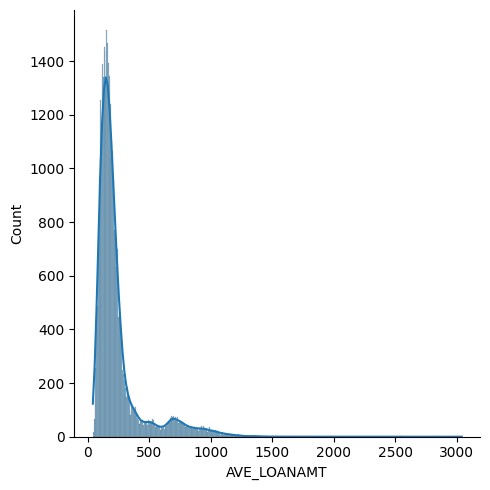

AVE_LOANAMT skewness:  2.776116846197745
AVE_LOANAMT kurtosis:  10.295564840229021


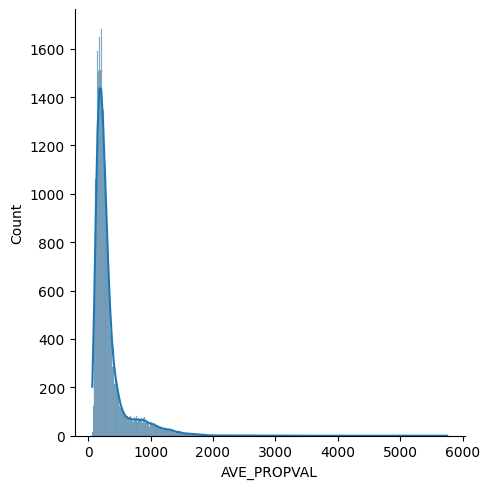

AVE_PROPVAL skewness:  3.0851284285985847
AVE_PROPVAL kurtosis:  15.663047136875


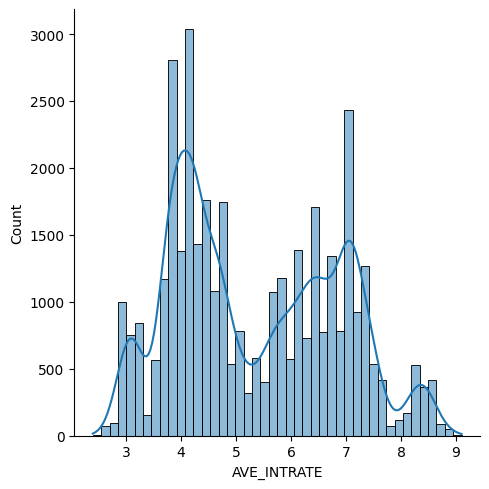

AVE_INTRATE skewness:  0.26261490595231524
AVE_INTRATE kurtosis:  -1.0809840060528428


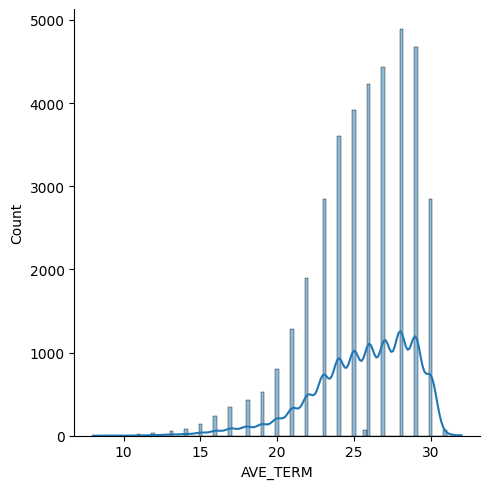

AVE_TERM skewness:  -0.9476874380552185
AVE_TERM kurtosis:  1.036102395321957


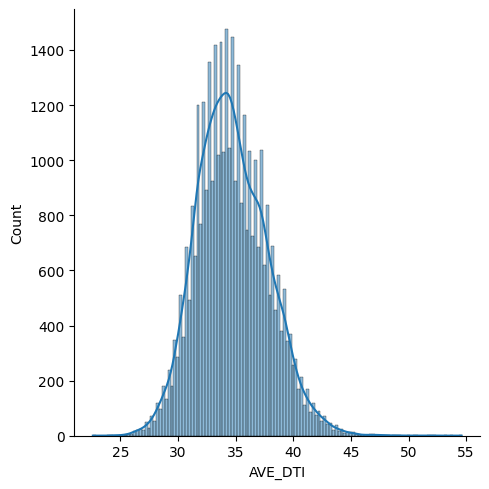

AVE_DTI skewness:  0.362830346537872
AVE_DTI kurtosis:  0.39184970068256275


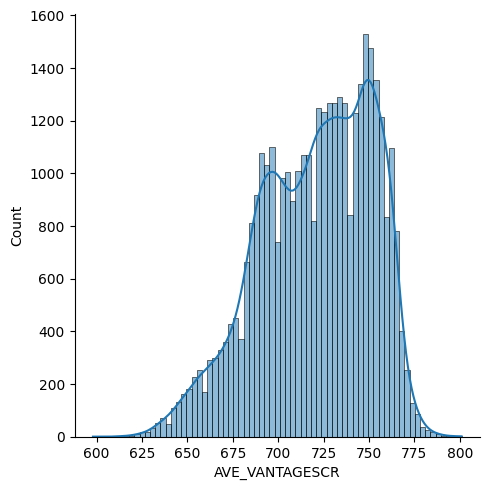

AVE_VANTAGESCR skewness:  -0.46053957460588196
AVE_VANTAGESCR kurtosis:  -0.44048745393896294


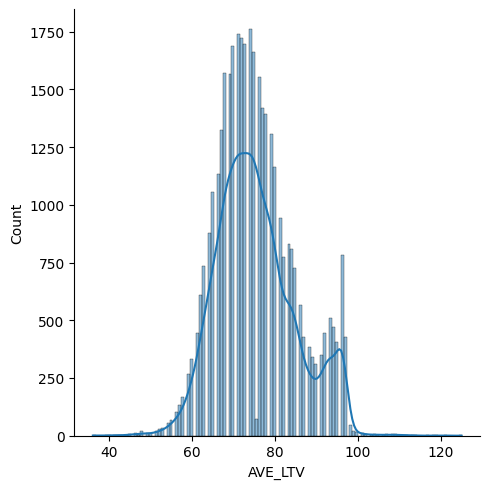

AVE_LTV skewness:  0.44611440618150994
AVE_LTV kurtosis:  0.07354075256105519


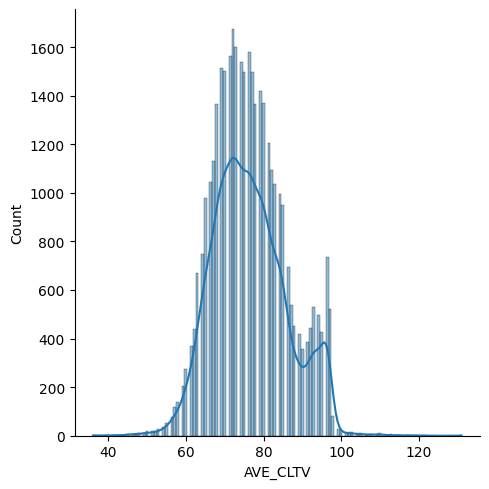

AVE_CLTV skewness:  0.3433746612833633
AVE_CLTV kurtosis:  -0.008295052452037321


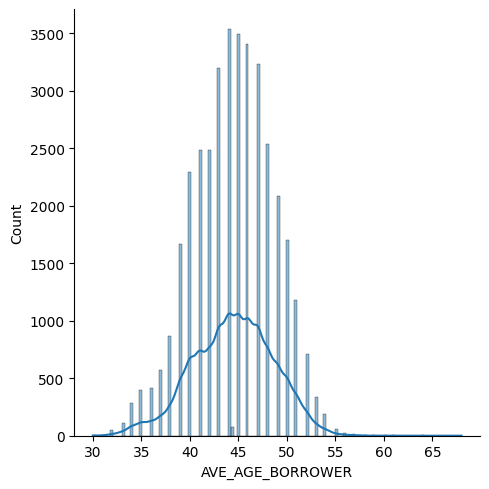

AVE_AGE_BORROWER skewness:  -0.15948758263132395
AVE_AGE_BORROWER kurtosis:  -0.09804880413307693


In [72]:
#plot to distribution of all columns in data using sns
for col in data.columns[4:]:
    if 'AVE' not in col:
        continue
    sns.displot(data[col], kde = True)
    plt.show()
    print(col, 'skewness: ', skew(data[col]))
    print(col, 'kurtosis: ', kurtosis(data[col]))

In [73]:
data['AVE_LOANAMT'].mean()

242.11489885475754

In [74]:
data.shape

(37445, 62)

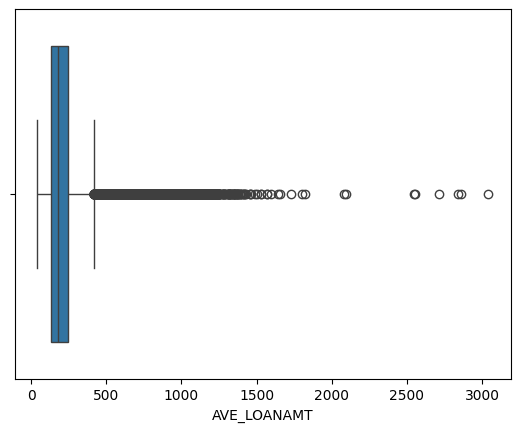

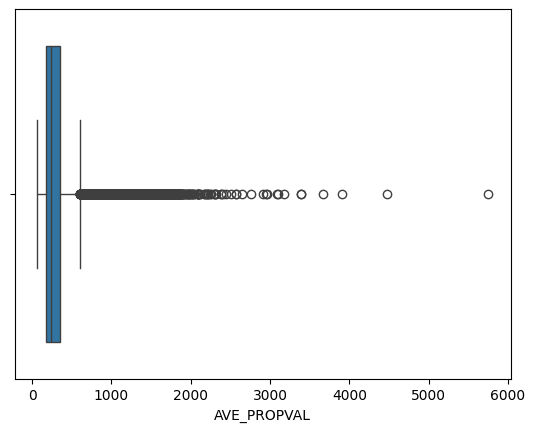

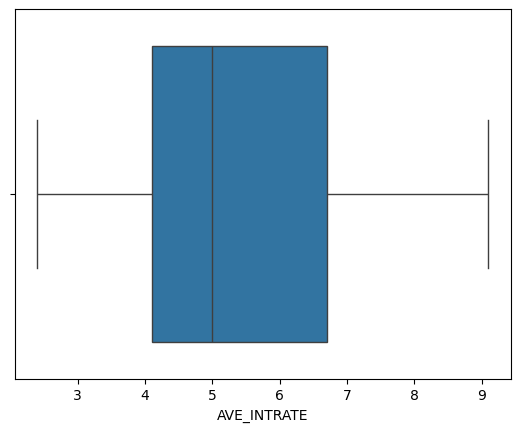

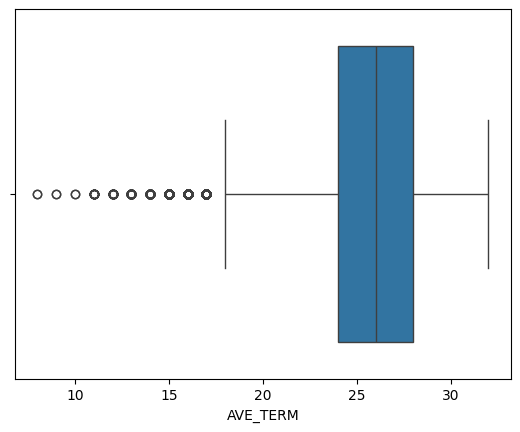

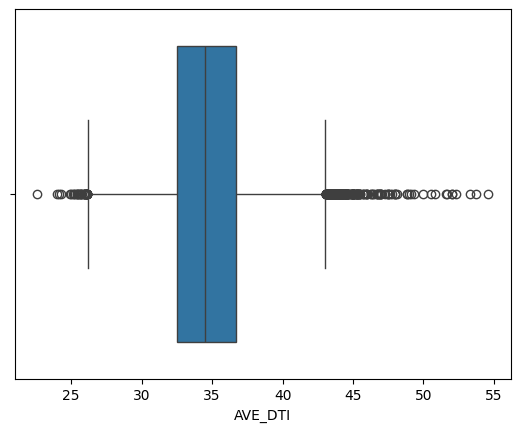

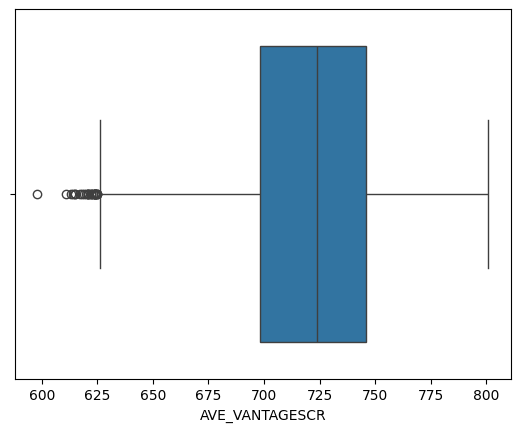

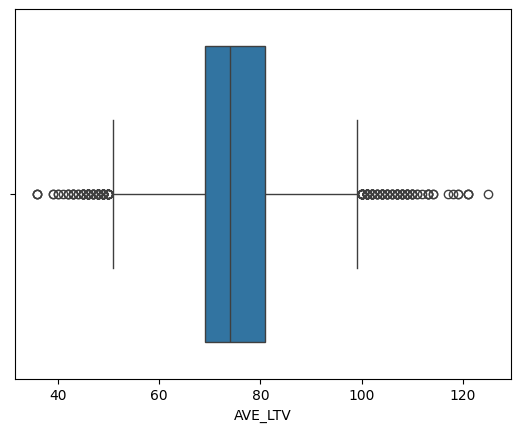

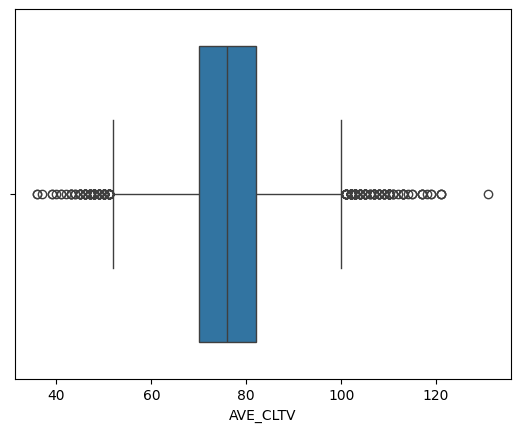

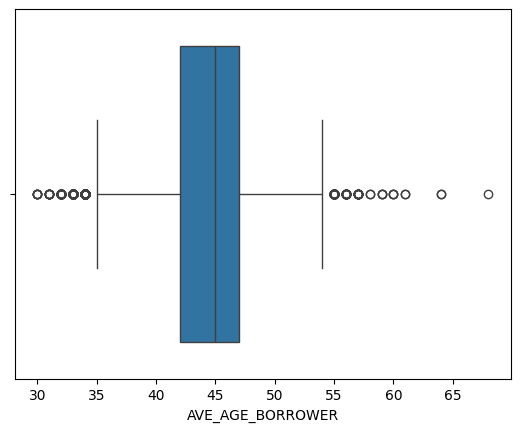

In [75]:
# plot box plot for all columns in data
for col in data.columns[4:]:
    if 'AVE' not in col:
        continue
    sns.boxplot(x=data[col])
    plt.show()

In [76]:
data['GEOLEVEL'].value_counts()

GEOLEVEL
State              29381
Census Division     5184
Census Region       2304
National             576
Name: count, dtype: int64

In [77]:
unemployment = pd.read_csv('united-states-unemployment-rate.csv')

In [78]:
unemployment['YEAR'] = unemployment['date'].apply(lambda x: x.split('-')[0])

In [79]:
unemployment = unemployment.drop(columns=['date'])

In [80]:
unemployment['YEAR'] = unemployment['YEAR'].astype(int)
for cols in unemployment.columns:
    if cols != 'YEAR':
        unemployment[cols] = unemployment[cols].astype(float)

In [81]:
temp = pd.merge(data, unemployment, on='YEAR', how='left')

In [82]:
temp = temp.rename(columns={'Unemployment Rate (%)': 'UNEMPLOYMENT_RATE', 'Annual Change': 'ANNUAL_CHANGE_UNEMPLOYMENT_RATE'})

In [83]:
gdp = pd.read_csv('united-states-gdp-gross-domestic-product.csv')

In [84]:
gdp

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change
0,1960-12-31,543.300000,3007.1234,0.0000
1,1961-12-31,563.300000,3066.5629,2.3000
2,1962-12-31,605.100000,3243.8431,6.1000
3,1963-12-31,638.600000,3374.5152,4.4000
4,1964-12-31,685.800000,3573.9412,5.8000
...,...,...,...,...
58,2018-12-31,20533.057312,62823.3094,2.9454
59,2019-12-31,21380.976119,65120.3947,2.2944
60,2020-12-31,21060.473613,63528.6343,-2.7678
61,2021-12-31,23315.080560,70219.4725,5.9455


In [85]:
gdp['YEAR'] = gdp['date'].apply(lambda x: x.split('-')[0])
gdp = gdp.drop(columns=['date'])

In [86]:
gdp['YEAR'] = gdp['YEAR'].astype(int)
for cols in gdp.columns:
    if cols == 'YEAR':
        continue
    gdp[cols] = gdp[cols].astype(float)

In [87]:
temp = temp.merge(gdp, on='YEAR', how='left')

In [88]:
temp = temp.rename(columns={'GDP ( Billions of US $)': 'GDP', 'Annual % Change': 'ANNUAL_CHANGE_GDP'})
temp = temp.drop(columns=['Per Capita (US $)'])

In [93]:
inflation = pd.read_csv('united-states-inflation-rate-cpi.csv')

In [94]:
inflation['YEAR'] = inflation['date'].apply(lambda x: x.split('-')[0])
inflation = inflation.drop(columns=['date'])

In [95]:
inflation['YEAR'] = inflation['YEAR'].astype(int)
for cols in inflation.columns:
    if cols == 'YEAR':
        continue
    inflation[cols] = inflation[cols].astype(float)

In [96]:
temp = temp.merge(inflation, on='YEAR', how='left')

In [97]:
temp = temp.rename(columns={'Inflation Rate(%)': 'INFLATION_RATE', 'Annual Change': 'ANNUAL_CHANGE_INFLATION_RATE'})

In [98]:
temp.columns

Index(['GEOLEVEL', 'GEOID', 'GEONAME', 'MARKET', 'YEAR', 'TOT_ORIG',
       'AVE_LOANAMT', 'AVE_PROPVAL', 'AVE_INTRATE', 'PCT_INTRATE_LT_3',
       'PCT_INTRATE_3_4', 'PCT_INTRATE_4_5', 'PCT_INTRATE_5_6',
       'PCT_INTRATE_GE_6', 'PCT_OWNOCC', 'AVE_TERM', 'PCT_ARM',
       'PCT_TERM_FRM_15', 'PCT_TERM_FRM_30', 'AVE_DTI', 'PCT_DTI_LE36',
       'PCT_DTI_3743', 'PCT_DTI_GE44', 'AVE_VANTAGESCR', 'PCT_VS_VERYPOOR',
       'PCT_VS_POOR', 'PCT_VS_FAIR', 'PCT_VS_GOOD', 'PCT_VS_EXCELLENT',
       'AVE_LTV', 'AVE_CLTV', 'PCT_LTV_LE70', 'PCT_LTV_7080', 'PCT_LTV_8090',
       'PCT_LTV_9095', 'PCT_LTV_9597', 'PCT_LTV_GT97', 'PCT_GOVERNMENT',
       'PCT_ENTERPRISE', 'PCT_OTHERCONFORMING', 'PCT_NONCONFORMING', 'PCT_WHT',
       'PCT_BLK', 'PCT_ASN', 'PCT_HPI', 'PCT_AMI', 'PCT_MIX', 'PCT_HIS',
       'PCT_HSP', 'PCT_WNH', 'PCT_MNH', 'AVE_AGE_BORROWER', 'PCT_AGE_LT25',
       'PCT_AGE_2534', 'PCT_AGE_3544', 'PCT_AGE_4554', 'PCT_AGE_5564',
       'PCT_AGE_GE65', 'PCT_MALEBOR', 'PCT_FEMALEBOR', 'PCT_

In [89]:
temp.to_csv('new_data.csv', index=False)